Вариант 6

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow.keras.datasets
from  tensorflow.keras.datasets import mnist
from  tensorflow.keras.layers import Input, Dense

In [132]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x/255
test_x = test_x/255

train_x= np.reshape(train_x, (len(train_x), 28*28))
test_x= np.reshape(test_x, (len(test_x), 28*28))

In [133]:
inputs = Input(shape = (28* 28))
x = Dense(150, activation= 'relu')(inputs)
x = Dense(32, activation= 'relu')(x)
x = Dense(10, activation= 'relu')(x)
encoder = Dense(3, activation = 'linear')(x)

inputs_dec = Input(shape = (3, ))
x = Dense(10, activation= 'relu')(inputs_dec)
x = Dense(32, activation= 'relu')(x)
x = Dense(128, activation= 'relu')(x)
decoder = Dense(28*28, activation='relu')(x)

In [134]:
encoder_model= keras.Model(inputs, encoder)
decoder_model= keras.Model(inputs_dec, decoder)
autoenc = keras.Model(inputs, decoder_model(encoder_model(inputs)))

In [161]:
from tensorflow.keras.utils import plot_model
autoenc.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 784)]             0         
                                                                 
 model_27 (Functional)       (None, 3)                 122945    
                                                                 
 model_28 (Functional)       (None, 784)               105752    
                                                                 
Total params: 228,697
Trainable params: 228,697
Non-trainable params: 0
_________________________________________________________________


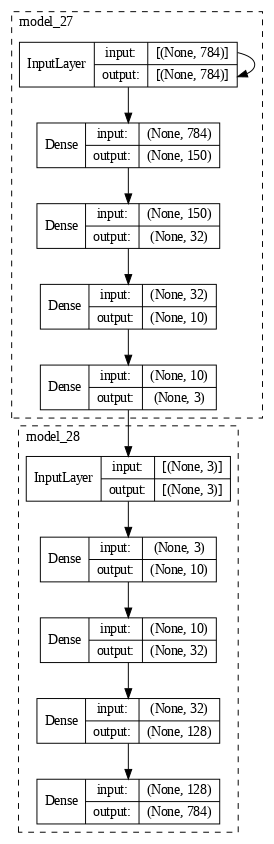

In [162]:
plot_model(autoenc, expand_nested= True, show_shapes= True, show_layer_names= False, dpi = 70)

In [137]:
autoenc.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics = ['accuracy'])

In [138]:
autoenc.fit(train_x, train_x, epochs = 7, batch_size = 150)

Epoch 1/7
400/400 [==============================] - 7s 10ms/step - loss: 0.0611 - accuracy: 0.0109
Epoch 2/7
400/400 [==============================] - 6s 16ms/step - loss: 0.0487 - accuracy: 0.0088
Epoch 3/7
400/400 [==============================] - 6s 15ms/step - loss: 0.0443 - accuracy: 0.0084
Epoch 4/7
400/400 [==============================] - 4s 10ms/step - loss: 0.0417 - accuracy: 0.0085
Epoch 5/7
400/400 [==============================] - 4s 10ms/step - loss: 0.0396 - accuracy: 0.0100
Epoch 6/7
400/400 [==============================] - 5s 13ms/step - loss: 0.0383 - accuracy: 0.0104
Epoch 7/7
400/400 [==============================] - 4s 10ms/step - loss: 0.0377 - accuracy: 0.0105


In [169]:
autoenc.save('drive2/MyDrive/autoncoder_model')

313/313 [==============================] - 1s 2ms/step
Исходное изображение:


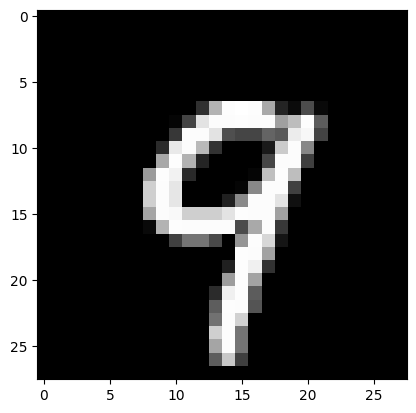

In [156]:
imageindex = 12

y = autoenc.predict(test_x)
plt.imshow(test_x[int(imageindex)].reshape(28, 28), cmap = 'gray')
print("Исходное изображение:")

Полученное изображение:


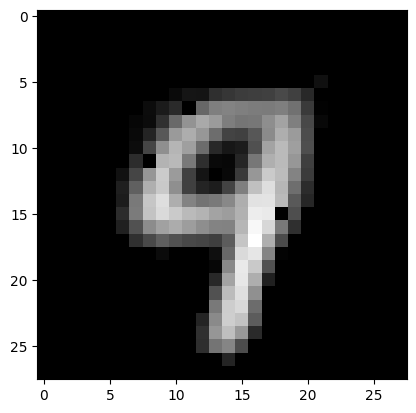

In [157]:
plt.imshow(y[int(imageindex)].reshape(28, 28), cmap = 'gray')
print("Полученное изображение:")

In [168]:
from google.colab import drive
drive.mount('/content/drive2')

Mounted at /content/drive2
